Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Hung-Wei Chang"
COLLABORATORS = ""

---

<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# Assignment 6

In [2]:
# Run this before any other code cell
# This downloads the csv data files into the same directory where you have saved this notebook

import urllib.request
from pathlib import Path
import os
path = Path()

import warnings
warnings.filterwarnings("ignore")

# Dictionary of file names and download links
files = {'AEP_hourly.csv':'https://storage.googleapis.com/aipi_datasets/AEP_hourly.csv',
        'Retail_Sales.csv': 'https://storage.googleapis.com/aipi_datasets/Retail_Sales.csv'}

# Download each file
for key,value in files.items():
    filename = path/key
    url = value
    # If the file does not already exist in the directory, download it
    if not os.path.exists(filename):
        urllib.request.urlretrieve(url,filename)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import r2_score,mean_squared_error

# Disable pandas warnings
pd.options.mode.chained_assignment = None  # default='warn'

## Part 1: Energy consumption
Run the below cell to read in the data for Part 1 (may take up to a minute to convert the dates to pandas datetime).  The data contains an hourly datetime timestamp which we will use as the index, and a corresponding hourly energy consumption value in MW.

In [4]:
aep_data = pd.read_csv('AEP_hourly.csv',usecols=['Datetime','AEP_MW'],parse_dates=['Datetime'],index_col='Datetime')
aep_data.head()

,AEP_MW
Datetime,
2004-10-01 01:00:00,12379
2004-10-01 02:00:00,11935
2004-10-01 03:00:00,11692
2004-10-01 04:00:00,11597
2004-10-01 05:00:00,11681


We will use a subset of the data for our analysis: the data from January 1 2005 00:00 to December 31 2009 23:00.  Running the cell below will create this subset.

In [5]:
# Take a subset for analysis
aep_data_subset = aep_data.loc[(aep_data.index>=pd.to_datetime('2005-01-01 00:00')) & (aep_data.index<=pd.to_datetime('2009-12-31 23:00'))]
aep_data_subset.head()

,AEP_MW
Datetime,
2005-01-01 00:00:00,12892
2005-01-01 01:00:00,12316
2005-01-01 02:00:00,11890
2005-01-01 03:00:00,11579
2005-01-01 04:00:00,11461


### Question 1.1
Complete the below function `identify_periods()`.  The function should return 3 boolean (True/False) values in the following order:  
-`annual_period`: Set to `True` if the data appears to have a visible annual period (values vary based on day of year), otherwise `False`  
-`weekly_period`: Set to `True` if the data appears to have a visible weekly period (values vary based on day of week), otherwise `False`  
-`daily_period`: Set to `True` if the data appears to have a visible daily period (values vary based on time of day), otherwise False

For example, if there is a visible annual period but not a weekly or daily period, you would set the values to return as follows:  
`annual_period=True`  
`weekly_period=False`  
`daily_period=False`  
`return annual_period, weekly_period, daily_period`

You can determine these periods through visualization of the data.  You should be able to determine annual period by looking at a line plot of the data.  To evaluate weekly and daily periods, you may need to group your data (e.g. by day of week, or hour of day) and look at whether the mean energy usage appears to differ based on day of week or hour of day.  Note we are not asking you in this question to confirm if any noticed differences are statistically significant, only whether you are able to notice a visible difference indicating a likely period when plotting.

In [6]:
def identify_periods(data):
    # YOUR CODE HERE
    annual_period=True 
    weekly_period=True 
    daily_period=True  
    return annual_period, weekly_period, daily_period
    raise NotImplementedError()
    

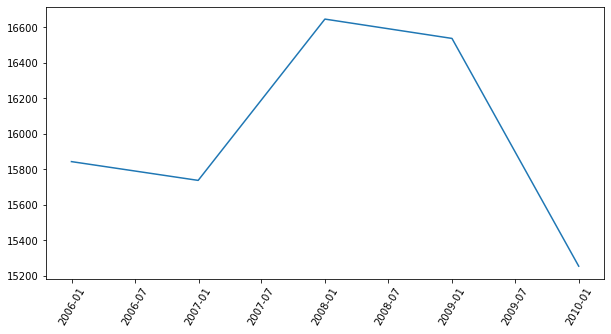

In [7]:
data_new = aep_data_subset.resample('A').mean()
# data_new['MONTH'] = aep_data_subset['FL_DATE'].dt.month

plt.figure(figsize=(10,5))
plt.plot(data_new)
plt.xticks(rotation=60)
plt.show()

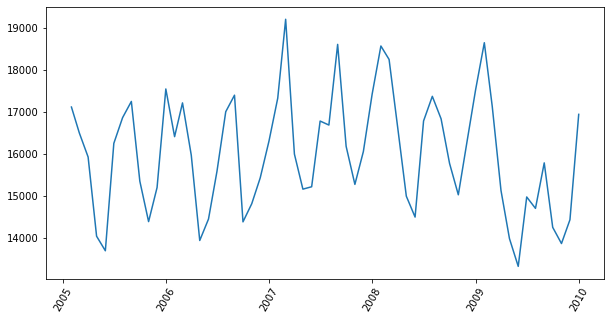

In [8]:
data_new = aep_data_subset.resample('M').mean()
# data_new['MONTH'] = aep_data_subset['FL_DATE'].dt.month

plt.figure(figsize=(10,5))
plt.plot(data_new)
plt.xticks(rotation=60)
plt.show()

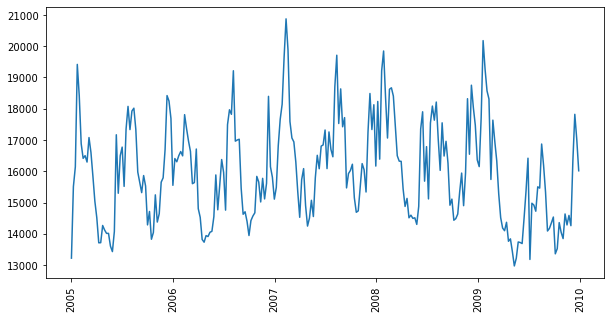

In [9]:
data_new = aep_data_subset.resample('W').mean()[:-1]
# data_new['MONTH'] = aep_data_subset['FL_DATE'].dt.month

plt.figure(figsize=(10,5))
plt.plot(data_new)
plt.xticks(rotation=90)
plt.show()

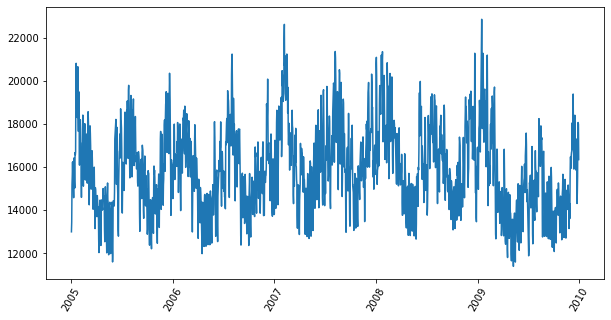

In [10]:
import datetime
data_new = aep_data_subset.resample('D').mean()
# data_new['MONTH'] = aep_data_subset['FL_DATE'].dt.month
plt.figure(figsize=(10,5))
plt.plot(data_new)
plt.xticks(rotation=60)
plt.show()

In [11]:
# Test cell for identify_periods()
annual_period,weekly_period,daily_period = identify_periods(aep_data_subset.copy())
for p in [annual_period,weekly_period,daily_period]:
    assert type(p)==bool

# Hidden test below

### Question 1.2
Let's now look more closely at the possibility of a daily period.  This means that the energy consumption for a given hour of the day is autocorrelated with the consumption at the same time period the previous day (t-24 hrs).  Complete the function `autocorr24()` below.  Your function should return the boolean value True (e.g. `return True`) if there is a statistically significant autocorrelation (at a 95% confidence interval) of energy consumption with the previous value at a lag of 24 (1 day / 24 hours).  If you observe no statistically significant autocorrelation with a lag of 24 hours, your function should return the boolean value False (e.g. `return False`).

Hint: you can determine this by using the autocorrelation plot from the statsmodel library.

In [12]:
def autocorr24(data):
    # YOUR CODE HERE
    return True
    raise NotImplementedError()

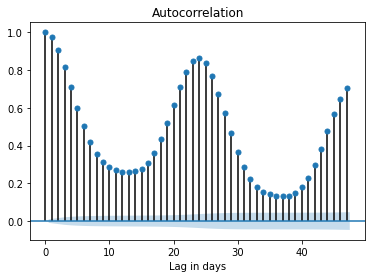

In [13]:
# Display autocorrelation plot of flights_per_day over the time period
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(aep_data_subset.copy())
plt.xlabel('Lag in days')
plt.show()

In [14]:
# Test cell for decompose_aep()
autocorr_bool = autocorr24(aep_data_subset.copy())
assert type(autocorr_bool) == bool

### Question 1.3
Understanding auto-correlation can be very useful in making short-term forecasts of the future. For example, assume an electric company needs to predict hourly consumption a day in advance.  The company could use known consumption for 12 noon to 1 pm to predict the 12 noon to 1 pm hour the next day, and so on. 

Complete the below function `aep_24hr_prediction()` which takes as input a subset of data (`aep_data_subset`) in a dataframe and uses it to create a simple linear regression model which uses the consumption value at t - 24 hours as the single input feature to predict the consumption at time t.  Fit your model to the data beginning at 00:00 on January 2, 2005.  Then, generate predictions for each hour in the time interval of `aep_data_subset` beginning at 00:00 on January 2, 2005, and calculate the residuals (errors) of those predictions.  

Note: you will have a few rows in your data where there is no t-24 consumption value available (due to time changes for daylight savings time).  For simplicity just remove these rows in our data where there is no t-24 value prior to training your linear regression model, since it will not be able to train the model if your feature includes null values.

Your function should return the following in order:  
- The mean squared error (MSE) of your linear regression model using the single feature, as a float 
- The R-squared value of your model, as a float. 
- A pandas dataframe with the index being the datetime timestamp (day and hour), and containing only the following columns:  
    - 'AEP_MW': contains the energy consumption value from the current hour (the target we are trying to predict). 
    - 'PREDS': contains the predicted energy consumption value for the hour from your model. 
    - 'RESIDS': contains the residual of your prediction (the actual value minus the prediction)

In [41]:
def aep_24hr_prediction(data):
    # YOUR CODE HERE
    df = data.copy()
    df['YesterdayCons'] = df['AEP_MW'].shift(1,freq='D') #Add new column containing count at t-1 (day before)
    df = df.dropna()
    
    # Create a single-variable linear regression on the count at t-1
    df_linmodel = LinearRegression()
    df_linmodel.fit(X=df['YesterdayCons'].values.reshape(-1,1), y=df['AEP_MW'])

    # Get in-sample predictions for the days in the month
    df_preds = df_linmodel.predict(df['YesterdayCons'].values.reshape(-1,1))

    # Add predictions and residuals to the dataframe
    df['PREDS'] = df_preds
    df['RESIDS']=df['AEP_MW']-df['PREDS']
    df = df[['AEP_MW','PREDS', 'RESIDS']]

    # # Display the model
    # print('The fitted model is: y = {:.3f}x + {:.3f}'.format(df_linmodel.coef_[0], df_linmodel.intercept_))

    # Calculate and display the model performance statistics
#     mse = float(np.sum(df['RESIDS']**2,axis=0)/df.shape[0])
#     r2 = float(1 - mse/np.var(df['AEP_MW']))
    
    r2 = r2_score(df['AEP_MW'], df_preds)
    mse = mean_squared_error(df['AEP_MW'], df_preds)
    
    return float(mse), float(r2), df
    raise NotImplementedError()

The simple linear model has R^2=0.750 and MSE=1680563.2


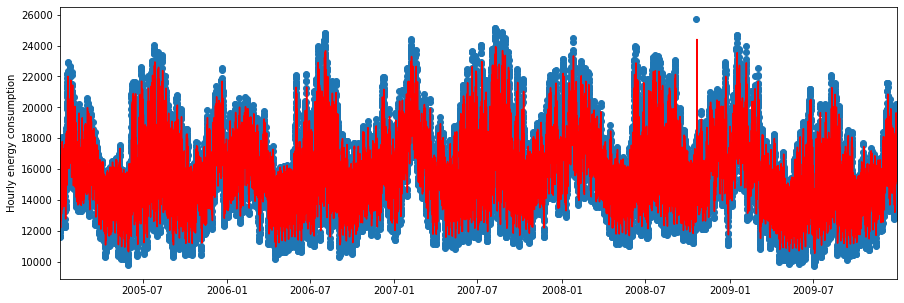

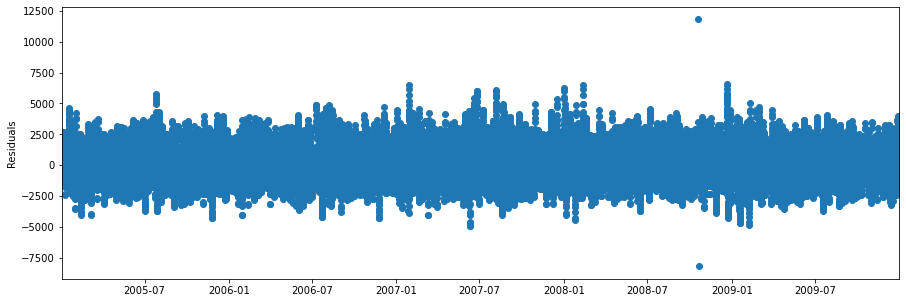

In [42]:
# Calculate and display the model performance statistics
mse,r2,data_out = aep_24hr_prediction(aep_data_subset.copy())
print('The simple linear model has R^2={:.3f} and MSE={:.1f}'.format(r2,mse))

# Plot the data and the predictions
plt.figure(figsize=(15,5))
plt.scatter(x=data_out.index, y=data_out['AEP_MW'])
plt.plot(data_out.index, data_out['PREDS'],color='red')
plt.xlim((data_out.index.min(),data_out.index.max()))
plt.ylabel('Hourly energy consumption')
plt.show()

plt.figure(figsize=(15,5))
plt.scatter(x=data_out.index, y=data_out['RESIDS'])
plt.xlim((data_out.index.min(),data_out.index.max()))
plt.ylabel('Residuals')
plt.show()

# Hidden tests below

## Part 2: Retail sales forecasting
In Part 2 we will be working with a set of retail sales data for each month in the time period.  Run the below cell to read in and display the data.

In [17]:
# Read in the data and display the head to see what data we have
retail_data = pd.read_csv("retail_sales.csv", parse_dates = ['DATE'],index_col='DATE')
training_data = retail_data.loc[(retail_data.index.year >= 1992) & (retail_data.index.year <2003)]
training_data.head()

,Sales
DATE,
1992-01-01,1509.0
1992-02-01,1541.0
1992-03-01,1597.0
1992-04-01,1675.0
1992-05-01,1822.0


### Question 2.1
Complete the function `sales_period()` below.  The function should return the boolean True (e.g. `return True`) if the data displays an annual seasonality, and False if not.  To determine if the data likely has an annual seasonality you can plot the data and determine if you visually identify a recurring pattern each year.

In [18]:
def sales_period(data):
    # YOUR CODE HERE
    return False
    raise NotImplementedError()

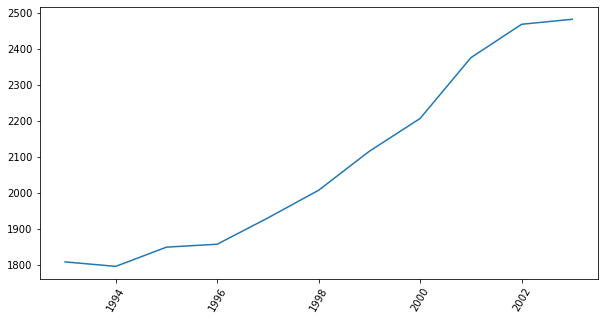

In [19]:
df_sales = training_data.resample('A').mean()

plt.figure(figsize=(10,5))
plt.plot(df_sales)
plt.xticks(rotation=60)
plt.show()

In [20]:
# Test cell for sales_period()
annual_period = sales_period(training_data)
assert type(annual_period)== bool


### Question 2.2
Complete the function `sales_decompose()` which should return the string "additive" (e.g. `return "additive"`) if the time series appears to be better fit by an additive model, or returns "multiplicative" if the time series appears to be better fit by a multiplicative model.  

You can use visualization to determine the answer to this - either via the plot of the data over time or via the statsmodel seasonal_decompose() plots.

In [21]:
def sales_decompose(data):
    # YOUR CODE HERE
    return "multiplicative"
    raise NotImplementedError()

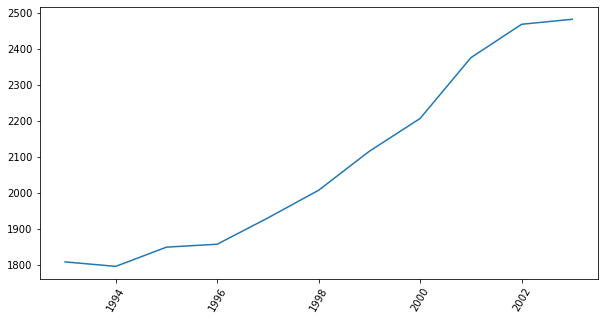

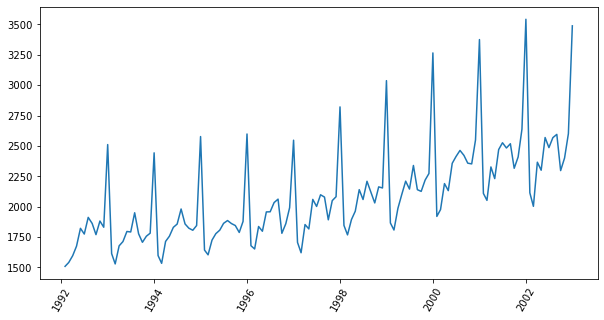

In [22]:
df_sales = training_data.resample('A').mean()

plt.figure(figsize=(10,5))
plt.plot(df_sales)
plt.xticks(rotation=60)
plt.show()

df_sales = training_data.resample('M').mean()

plt.figure(figsize=(10,5))
plt.plot(df_sales)
plt.xticks(rotation=60)
plt.show()


In [23]:
# Test cell for sales_decomposition()
ts_type = sales_decompose(training_data)
assert ts_type in ['additive','multiplicative']


### Question 2.3
Complete the below function `sales_autocorr()` which should return the lag value (in months, as an integer) with which sales has the highest autocorrelation (evaluate the autocorrelation up to a lag of 24 months).

In [24]:
def sales_autocorr(data):
    # YOUR CODE HERE
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf
    l = list(acf(training_data, nlags=24))
    l.remove(max(l))
    num = int(l.index(max(l)) + 1 )
    return num
    raise NotImplementedError()

In [25]:
# Test cell for sales_autocorr()
autocorr_month = sales_autocorr(training_data)
print('Your function found that sales has the highest autocorrelation at a lag of {} months'.format(autocorr_month))


Your function found that sales has the highest autocorrelation at a lag of 12 months


### Question 2.4
Let's try to model sales using a linear regression to capture only the trend in the data.  Complete the below function `sales_trend_model()`.  The function should first create a new feature representing the number of months which have passed since the start of the training period.  Hint: since our data spreads across multiple years, you may need to take the difference in years multiplied by 12 and then add the difference in month to get the total number of months elapsed.  You should then fit a linear regression model on the single feature "months_passed".  After you have trained your model, use it to generate predictions on the training set and calculate the R-squared value of your training set predictions.  Your function should return your trained model object and the R-squared value as a float.

In [26]:
def sales_trend_model(data):
    # YOUR CODE HERE
    # Create a single-variable linear regression and fit it to the data
    from sklearn.linear_model import LinearRegression
    df = data 
    df['months_passed'] =  ( df.index.year - df.index.min().year ) *12 +  (df.index.month - df.index.min().month ) 
     
    # Fit a linear model 
    linear_model = LinearRegression()
    trained_obj = linear_model.fit(X=df['months_passed'].values.reshape(-1,1), y=df['Sales'])

    # Get in-sample predictions (on the training set) for the days in the month
    linear_preds = linear_model.predict(df['months_passed'].values.reshape(-1,1))

    # Add predictions and residuals to the dataframe
    df['Preds'] = linear_preds
    df['resids']=df['Sales']-df['Preds']

    df.head()

    # Calculate the model performance statistics
    mse = np.sum(df['resids']**2,axis=0)/df.shape[0]
    r2 = 1 - np.sum((df['resids'])**2)/np.sum((df['Sales']-np.mean(df['Sales']))**2)
    
    return trained_obj, float(r2)
    
    raise NotImplementedError()
    

In [27]:
# Test cell for sales_trend_model()
trend_model,rsquared = sales_trend_model(training_data.copy())
print('Your model has an R-squared of {:.3f} on the training data'.format(rsquared))
assert type(trend_model)==LinearRegression


Your model has an R-squared of 0.458 on the training data


### Question 2.5
Complete the below function `create_test_set()` which takes the original full dataset (retail_data) as an input and returns a subset to use for the test set which consists of all the rows from the years 2003-2019, inclusive of 2003 and 2019.  Your test set should use the 'DATE' column as a datetime index and should have a single column "Sales" which includes the month sales.

In [28]:
def create_test_set(data):
    # YOUR CODE HERE
    df = data
    after_start_date = df.index >= '2003-01-01'
    before_end_date = df.index <= '2019-12-31'
    between_two_dates = after_start_date & before_end_date
    df_filtered = df.loc[between_two_dates]
    return df_filtered
    raise NotImplementedError()

In [29]:
test_set = create_test_set(retail_data.copy())
display(test_set.head())


,Sales
DATE,
2003-01-01,2121.0
2003-02-01,1940.0
2003-03-01,2187.0
2003-04-01,2333.0
2003-05-01,2576.0


### Question 2.6
Complete the below function `test_sales_trend_model()` which takes as input your trained linear regression model (which was returned from `sales_trend_model()`) and the test set (returned from `create_test_set`). The function should use the model to generate predictions on the test set, and then compute and return the R-squared value **of the test set predictions** as a float.  

Hint: in order to generate the test set input needed for your model, as you did above you will need to create a feature representing "months passed" for the test set.  However, be careful about the origin of calculating the "months passed" - to be consistent with the input your model expects, we need to calculate the number of "months passed" since the start of the training set (NOT since the start of the test set only).  First create your new feature for "months passed" since start of training period, then use your trained model passed as input to the function to generate predictions on this feature for the test set and compute the R-squared value of your test set predictions.

In [37]:
def test_sales_trend_model(model,test_data):
    # YOUR CODE HERE
    import datetime
    trend_model= model 

    x = datetime.datetime(1992, 1, 1)
    test_data['months_passed'] =  ( test_data.index.year - x.year ) *12 +  (test_data.index.month - x.month ) 

    # Get in-sample predictions (on the training set) for the days in the month
    linear_preds = trend_model.predict(test_data['months_passed'].values.reshape(-1,1))

    # Add predictions and residuals to the dataframe
    test_data['Preds'] = linear_preds
    test_data['resids']=test_data['Sales']-test_data['Preds']

    r2 = 1 - np.sum((test_data['resids'])**2)/np.sum((test_data['Sales']-np.mean(test_data['Sales']))**2)
    return float(r2)  
    raise NotImplementedError()

In [38]:
trend_r2_test = test_sales_trend_model(trend_model,test_set)
print("Your model's R-squared on the test set was {:.3f}".format(trend_r2_test))


Your model's R-squared on the test set was 0.370


### Question 2.7
Now let's try to model this time series using the seasonality component alone, assuming that we have an annual seasonality and the sales varies by month of the year.  Complete the below function `sales_seasonality_model()` which takes the training dataset as input and creates a model which uses the "month_of_year" as the feature.  As we did in class, you should "one-hot encode" the "month_of_year" feature by creating 12 dummy columns each representing a month of the year. The values in each column should be either a 0 (if it is not that month) or a 1 (if it is that month) for each row.  You should then train a linear regression model using ONLY these 12 columns/features representing each month.  After you have trained your model, generate the predictions on the training set and compute and return the R-squared value of the training set predictions, as a float.

In [32]:
def sales_seasonality_model(train_data):
    # YOUR CODE HERE
    # Add feature for day of week
    train_data = train_data.copy()
    train_data['month_of_year'] = train_data.index.month
    # Apply one-hot encoding to create a separate feature for each day of week
    train_data = pd.get_dummies(data = train_data, columns=['month_of_year'])

    # Create a linear regression and fit it to the data
    seasonality_model = LinearRegression(fit_intercept = False)
    X = train_data.drop(labels='Sales',axis=1)
    y = train_data['Sales']
    seasonality_model.fit(X, y)

    # Get in-sample predictions (on the training set)
    preds = seasonality_model.predict(X)

    # Add predictions and residuals to the dataframe
    train_data['Preds'] = preds
    train_data['resids']=train_data['Sales'] - train_data['Preds']
    

    # Calculate the model performance statistics
    # mse = np.sum(dowmodel_encoded['resids']**2,axis=0)/dowmodel_encoded.shape[0]
#     r2 = 1 - np.sum((train_data['resids'])**2)/np.sum((train_data['Sales']-np.mean(train_data['Sales']))**2)
    r2 = r2_score(y, preds)

    return float(r2)
    raise NotImplementedError()

In [33]:
r2_seasonal = sales_seasonality_model(training_data.copy())
print("Your model's R-squared on the training set was {:.3f}".format(r2_seasonal))


Your model's R-squared on the training set was 0.546


### Question 2.8
Let's now create a model using both the trend component and the seasonality component.  Complete the below function `sales_trendandseasonality_model()` which takes the training set and test set as inputs.  Your function should first create the training set features needed for the model, including a feature 'months_passed' to capture the long term trend (as we did above in `sales_trend_model()` and 12 dummy columns/features each representing a month of the year to capture the seasonality component (as we did above in `sales_seasonality_model()`.  Your final training set should thus have 13 features.  Train a linear regression model on these features for the training data only.  Then, create the same features for your test set dates, and use your model to generate predictions on the test set dates.  Finally, calculate the R-squared value of the test set predictions and return it from the function as a float.

In [34]:
def sales_trendandseasonality_model(train_data,test_data):
    # YOUR CODE HERE
    # Add feature for day of week
    train_data = training_data
    test_data = create_test_set(retail_data.copy())

    train_data['month_of_year'] = train_data.index.month
    train_data['months_passed'] =  ( train_data.index.year - train_data.index.min().year ) *12 +  (train_data.index.month - train_data.index.min().month ) 

    # Apply one-hot encoding to create a separate feature for each day of week
    train_data = pd.get_dummies(data = train_data, columns=['month_of_year'])

    # Create a linear regression and fit it to the data
    seasonality_model = LinearRegression()
    X = train_data.drop(labels='Sales',axis=1)
    y = train_data['Sales']
    seasonality_model.fit(X, y)

    # create test_data 
    import datetime
    x = datetime.datetime(1992, 1, 1)
    test_data['month_of_year'] = test_data.index.month
    test_data['months_passed'] =  ( test_data.index.year - x.year ) *12 +  (test_data.index.month - x.month ) 
    test_data = pd.get_dummies(data = test_data, columns=['month_of_year'])


    # Get predictions (on the test set)
    preds = seasonality_model.predict(test_data.drop(labels='Sales',axis=1))

    # Add predictions and residuals to the dataframe
    test_data['Preds'] = preds
    test_data['resids']=test_data['Sales'] - test_data['Preds']

    # Calculate the model performance statistics
    # mse = np.sum(dowmodel_encoded['resids']**2,axis=0)/dowmodel_encoded.shape[0]
    r2 = 1 - np.sum((test_data['resids'])**2)/np.sum((test_data['Sales']-np.mean(test_data['Sales']))**2)
    return float(r2)
    
    raise NotImplementedError()

In [35]:
r2score_test = sales_trendandseasonality_model(training_data.copy(),test_set.copy())
print("Your model's R-squared on the test set was {:.3f}".format(r2score_test))


Your model's R-squared on the test set was 0.525
